<a href="https://colab.research.google.com/github/blondeincode/Telco_customer_churn_modelling/blob/main/Telco_Customer_Churn_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data comes from [kaggle.com](https://www.kaggle.com/blastchar/telco-customer-churn)

In [1]:
import sys
!{sys.executable} -m pip install -U -q pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
import os
import urllib.request
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as po
import plotly.graph_objs as go
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [3]:
# Create path to data file
DATA_DIR = os.path.join('data')
DATA_URL = 'https://www.dropbox.com/s/xfrp2721386a8kh/telco_customer_churn.zip?dl=1'
DATA_FILENAME = 'data.zip'
DATA_FILEPATH = 'os.path.join(DATA_DIR, DATA_FILENAME)'

In [4]:
def init_directories():
  if not os.path.exists(DATA_DIR):
    os.makedirs(DATA_DIR)

In [5]:
data = urllib.request.urlretrieve(DATA_URL, DATA_FILEPATH)

In [6]:
init_directories()

with zipfile.ZipFile(DATA_FILEPATH, 'r') as zip_ref:
    zip_ref.extractall(DATA_DIR)

In [7]:
for path, subdirs, files in os.walk('data'):
    for name in files:
        print(os.path.join(path, name))

data/Telco_Customer_Churn.csv


In [8]:
df = pd.read_csv('data/Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
#Convert string values (Yes or No) in the Churn column to 1 or 0.
df.loc[df.Churn == 'No', 'Churn'] = 0
df.loc[df.Churn == 'Yes', 'Churn'] = 1
df['Churn'].head() #Checking

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: object

In [11]:
cols = ['OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport', 'StreamingTV',	'StreamingMovies']
for i in cols:
  df[i]=df[i].replace({'No internet service' : 'No'})
df.head() #Checking

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [12]:
TotalChargesMedian = df[df['TotalCharges'] !=' ']['TotalCharges'].astype(float).median()
TotalChargesMedian

1397.475

In [13]:
#We replace empty cells with the median
df['TotalCharges'][df['TotalCharges'] == ' '] = TotalChargesMedian

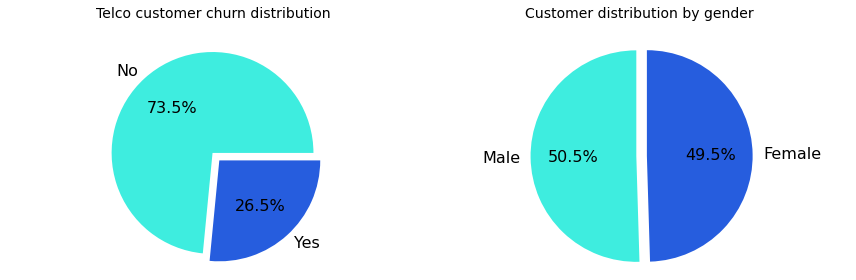

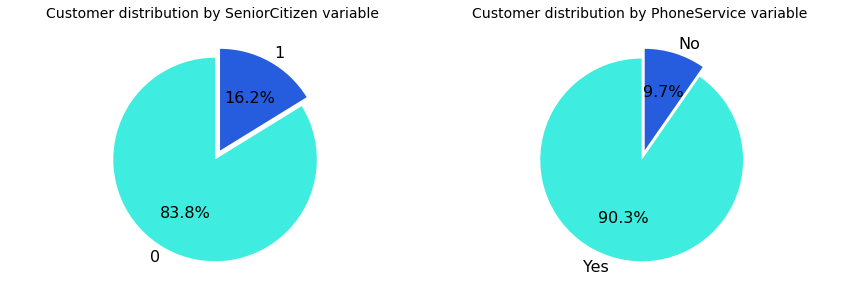

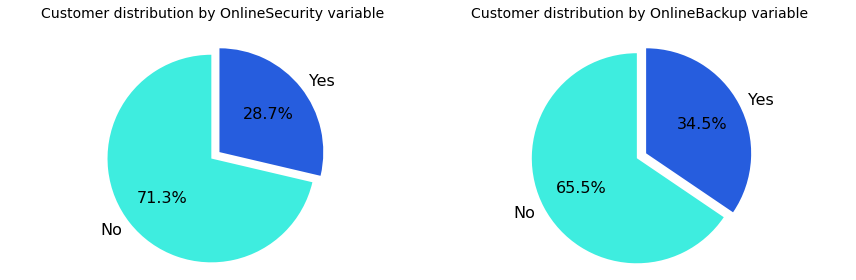

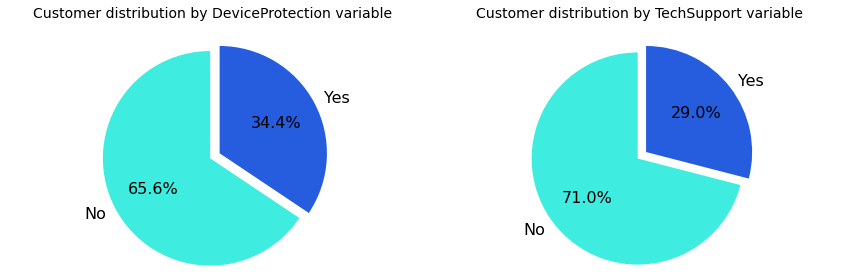

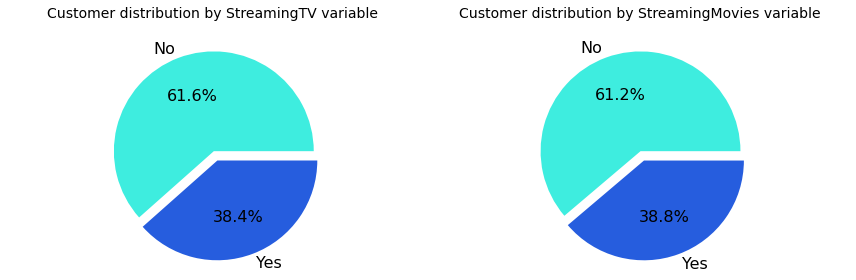

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Telco customer churn distribution \n', fontsize=14)
ax1.pie(df['Churn'].value_counts(), labels=['No', 'Yes'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=0, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax1.axis('equal')  
plt.tight_layout()

ax2.set_title('Customer distribution by gender \n', fontsize=14)
ax2.pie(df['gender'].value_counts(), labels=['Male', 'Female'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Customer distribution by SeniorCitizen variable \n', fontsize=14)
ax1.pie(df['SeniorCitizen'].value_counts(), labels=['0', '1'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax1.axis('equal')  
plt.tight_layout()

ax2.set_title('Customer distribution by PhoneService variable \n', fontsize=14)
ax2.pie(df['PhoneService'].value_counts(), labels=['Yes', 'No'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Customer distribution by OnlineSecurity variable \n', fontsize=14)
ax1.pie(df['OnlineSecurity'].value_counts(), labels=['No', 'Yes'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax1.axis('equal')  
plt.tight_layout()

ax2.set_title('Customer distribution by OnlineBackup variable \n', fontsize=14)
ax2.pie(df['OnlineBackup'].value_counts(), labels=['No', 'Yes'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Customer distribution by DeviceProtection variable \n', fontsize=14)
ax1.pie(df['DeviceProtection'].value_counts(), labels=['No', 'Yes'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax1.axis('equal')  
plt.tight_layout()

ax2.set_title('Customer distribution by TechSupport variable \n', fontsize=14)
ax2.pie(df['TechSupport'].value_counts(), labels=['No', 'Yes'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.set_title('Customer distribution by StreamingTV variable \n', fontsize=14)
ax1.pie(df['StreamingTV'].value_counts(), labels=['No', 'Yes'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=0, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax1.axis('equal')  
plt.tight_layout()

ax2.set_title('Customer distribution by StreamingMovies variable \n', fontsize=14)
ax2.pie(df['StreamingMovies'].value_counts(), labels=['No', 'Yes'], colors=['#3eeddf','#265dde'], autopct='%1.1f%%', 
        startangle=0, explode=[0.1,0], textprops={'fontsize': 16})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

plt.show()

In [15]:
churn_by_gender = df.groupby([df['gender']])[['Churn']].sum().reset_index()
churn_by_gender

,gender,Churn
0,Female,939
1,Male,930


In [16]:
churn_by_contract = df.groupby([df['Contract']])[['Churn']].sum().reset_index()
churn_by_contract

,Contract,Churn
0,Month-to-month,1655
1,One year,166
2,Two year,48


In [17]:
churn_by_payment = df.groupby([df['PaymentMethod']])[['Churn']].sum().reset_index()
churn_by_payment

,PaymentMethod,Churn
0,Bank transfer (automatic),258
1,Credit card (automatic),232
2,Electronic check,1071
3,Mailed check,308


In [18]:
churn_by_internetservice = df.groupby([df['InternetService']])[['Churn']].sum().reset_index()
churn_by_internetservice

,InternetService,Churn
0,DSL,459
1,Fiber optic,1297
2,No,113


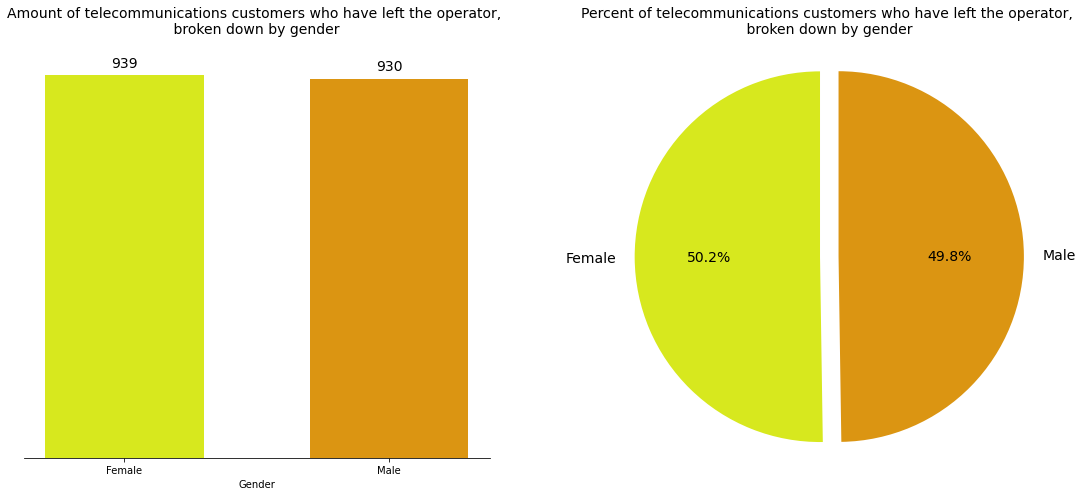

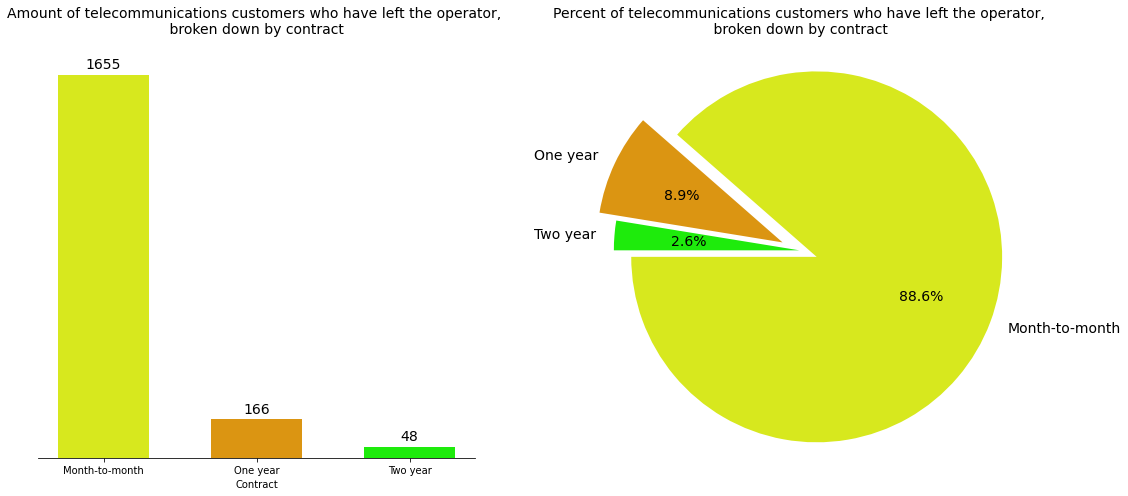

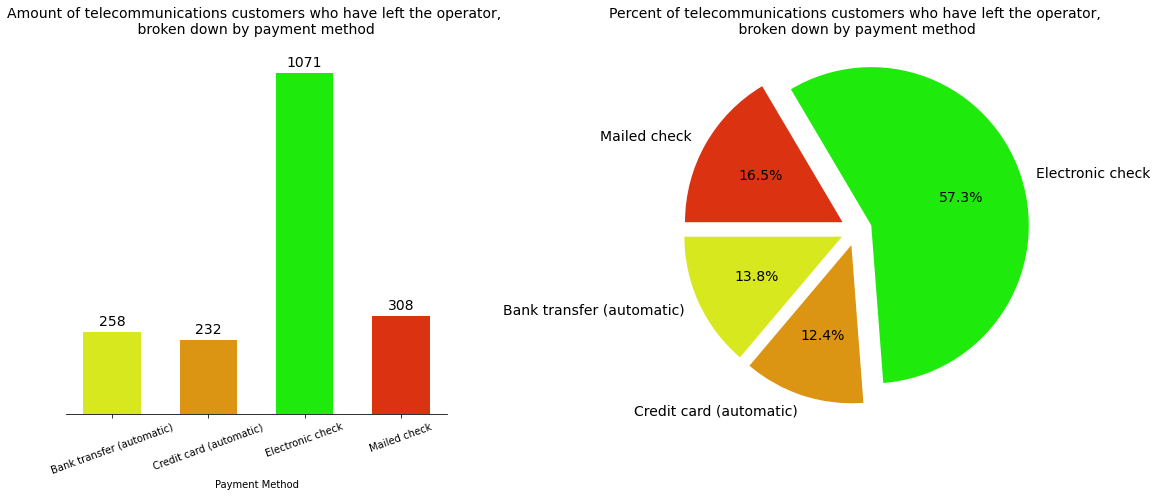

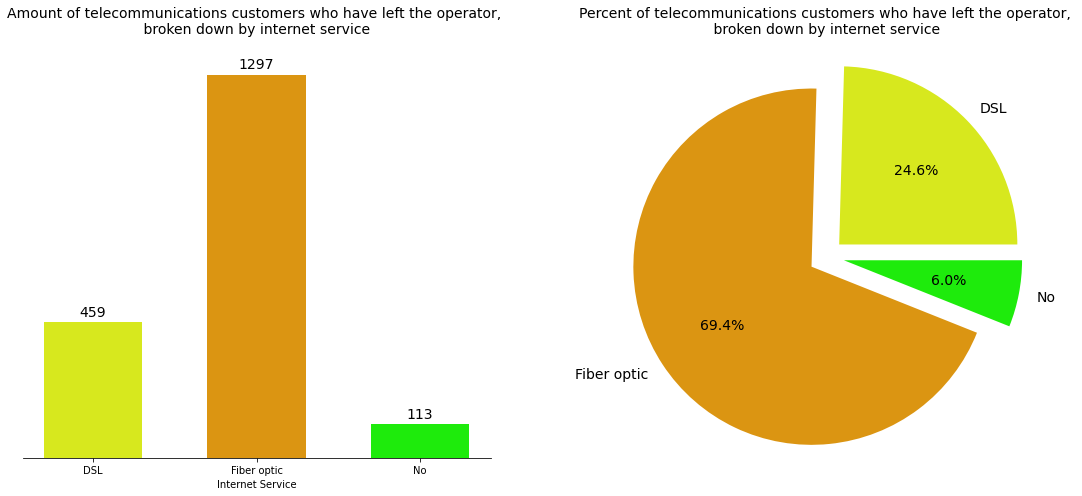

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
ax1.bar(churn_by_gender['gender'], churn_by_gender['Churn'], width=0.6, color=['#d7e81e','#db9512'])
ax1.set_title('Amount of telecommunications customers who have left the operator, \n broken down by gender \n', fontsize=14)
ax1.set_xlabel('Gender')
plt.xticks(rotation=0)
for i in churn_by_gender.index:
    ax1.annotate(f"{churn_by_gender['Churn'][i]}", xy=(i, churn_by_gender['Churn'][i] + 30), va = 'center', ha='center', 
                fontsize=14, fontweight='light', color='black')
for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Percent of telecommunications customers who have left the operator, \n broken down by gender \n', fontsize=14)
ax2.pie(churn_by_gender['Churn'], labels=churn_by_gender['gender'], colors=['#d7e81e','#db9512'], autopct='%1.1f%%', 
        startangle=90, explode=[0.1,0], textprops={'fontsize': 14})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
ax1.bar(churn_by_contract['Contract'], churn_by_contract['Churn'], width=0.6, color=['#d7e81e','#db9512','#1eeb0c'])
ax1.set_title('Amount of telecommunications customers who have left the operator, \n broken down by contract \n', fontsize=14)
ax1.set_xlabel('Contract')
plt.xticks(rotation=0)
for i in churn_by_contract.index:
    ax1.annotate(f"{churn_by_contract['Churn'][i]}", xy=(i, churn_by_contract['Churn'][i] + 45), va = 'center', ha='center', 
                fontsize=14, fontweight='light', color='black')
for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Percent of telecommunications customers who have left the operator, \n broken down by contract \n', fontsize=14)
ax2.pie(churn_by_contract['Churn'], labels=churn_by_contract['Contract'], colors=['#d7e81e','#db9512','#1eeb0c'], autopct='%1.1f%%', 
        startangle=180, explode=[0.1,0.1,0], textprops={'fontsize': 14})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
ax1.bar(churn_by_payment['PaymentMethod'], churn_by_payment['Churn'], width=0.6, color=['#d7e81e','#db9512','#1eeb0c','#db3312'])
ax1.set_title('Amount of telecommunications customers who have left the operator, \n broken down by payment method \n', fontsize=14)
ax1.set_xlabel('Payment Method')
ax1.set_xticklabels(labels=churn_by_payment['PaymentMethod'], rotation=20)
for i in churn_by_payment.index:
    ax1.annotate(f"{churn_by_payment['Churn'][i]}", xy=(i, churn_by_payment['Churn'][i] + 35), va = 'center', ha='center', 
                fontsize=14, fontweight='light', color='black')
for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Percent of telecommunications customers who have left the operator, \n broken down by payment method \n', fontsize=14)
ax2.pie(churn_by_payment['Churn'], labels=churn_by_payment['PaymentMethod'], colors=['#d7e81e','#db9512','#1eeb0c','#db3312'], 
        autopct='%1.1f%%', startangle=180, explode=[0.1, 0.1, 0.1, 0.1], textprops={'fontsize': 14})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,7))
ax1.bar(churn_by_internetservice['InternetService'], churn_by_internetservice['Churn'], width=0.6, color=['#d7e81e','#db9512','#1eeb0c'])
ax1.set_title('Amount of telecommunications customers who have left the operator, \n broken down by internet service \n', fontsize=14)
ax1.set_xlabel('Internet Service')
plt.xticks(rotation=0)
for i in churn_by_internetservice.index:
    ax1.annotate(f"{churn_by_internetservice['Churn'][i]}", xy=(i, churn_by_internetservice['Churn'][i] + 35), va = 'center', ha='center', 
                fontsize=14, fontweight='light', color='black')
for s in ['top', 'left', 'right']:
    ax1.spines[s].set_visible(False)
ax1.axes.get_yaxis().set_visible(False)

ax2.set_title('Percent of telecommunications customers who have left the operator, \n broken down by internet service \n', fontsize=14)
ax2.pie(churn_by_internetservice['Churn'], labels=churn_by_internetservice['InternetService'], colors=['#d7e81e','#db9512','#1eeb0c'], 
        autopct='%1.1f%%', startangle=0, explode=[ 0.1, 0.1, 0.1], textprops={'fontsize': 14})
fig = plt.gcf()
ax2.axis('equal')  
plt.tight_layout()

plt.show()

In [20]:
categorical = ['gender',	'SeniorCitizen',	'Partner',	'Dependents',	'PhoneService',	'MultipleLines', 
               'InternetService',	'OnlineSecurity',	'OnlineBackup',	'DeviceProtection',	'TechSupport',	
               'StreamingTV',	'StreamingMovies', 'Contract',	'PaperlessBilling',	'PaymentMethod']

In [21]:
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [22]:
for col in categorical:
  df[col] = pd.Categorical(df[col])

for col in numerical:
  df[col] = df[col].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   category
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   float64 
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [24]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [25]:
df.describe(include=['category'])

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,2,2,2,2,2,2,3,2,4
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,3555,5901,3641,4933,6361,3390,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365


In [26]:
#Perform One Hot Encoding using get_dummies method
df=pd.get_dummies(df, columns = categorical, drop_first = True)
df.head() #Checking

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1.0,29.85,29.85,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34.0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2.0,53.85,108.15,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45.0,42.30,1840.75,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,9237-HQITU,2.0,70.70,151.65,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [27]:
#Perform Feature Scaling on 'tenure', 'MonthlyCharges', 'TotalCharges' in order to bring them on same scale.
#Apply the feature scaling operation on dataset using fit_transform() method.
standardScaler = StandardScaler()
df[numerical] = standardScaler.fit_transform(df[numerical])
df.head() #Checking

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-1.277445,-1.160323,-0.994242,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,0.066327,-0.259629,-0.173244,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,-1.236724,-0.362660,-0.959674,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,0.514251,-0.746535,-0.194766,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0
4,9237-HQITU,-1.236724,0.197365,-0.940470,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0


In [28]:
#Number of columns increased and have suffixes attached, as a result of get_dummies() method.
df.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [29]:
#Create Feature variable X and Target variable y.
y = df['Churn'].astype(int)
X = df.drop(['Churn','customerID'], axis = 1)

In [30]:
#Split the data into training set (70%) and test set (30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [31]:
#Fit the Logistic Regression Model
logistic_model = LogisticRegression(random_state = 50)
logistic_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=50, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
#Predict the value for new data
logistic_pred = logistic_model.predict(X_test)

#Find accuracy using accuracy_score) method
logistic_accuracy = round(metrics.accuracy_score(y_test, logistic_pred) * 100, 2)

In [33]:
#Fit the SUpport Vector Machine Model
svc_model = SVC(kernel = 'linear', random_state = 50, probability = True)
svc_model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=50, shrinking=True, tol=0.001,
    verbose=False)

In [34]:
#Predict the value for new data
svc_pred = svc_model.predict(X_test)

#Find accuracy using accuracy_score() method
svc_accuracy = round(metrics.accuracy_score(y_test, svc_pred) * 100, 2)

In [35]:
#Fit the K-Nearest Neighbour Model
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2) # p=2 represents Euclidean distance
knn_model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
#Predict the value for new data
knn_pred = knn_model.predict(X_test)

#Find accuracy using accuracy_score() method
knn_accuracy = round(metrics.accuracy_score(y_test, knn_pred) * 100, 2)

In [37]:
#Fit the Decision Tree Classification Model
dt_model = DecisionTreeClassifier(criterion ='gini', random_state = 50)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=50, splitter='best')

In [38]:
#Predict the value for new data
dt_pred = dt_model.predict(X_test)

#Find accuracy using accuracy_score() method
dt_accuracy = round(metrics.accuracy_score(y_test, dt_pred) * 100, 2)

In [39]:
#Fit the Random Forest Classification Model
rf_model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [40]:
#Predict the value for new data
rf_pred = rf_model.predict(X_test)

#Find accuracy using accuracy_score() method
rf_accuracy = round(metrics.accuracy_score(y_test, rf_pred) * 100, 2)

In [41]:
#Summary of models and their precision
model_summary = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Support Vector Machine', 'K-Nearest Neighbor', 
               'Decision Tree', 'Random Forest'],
    'Score' : [logistic_accuracy, svc_accuracy, knn_accuracy, dt_accuracy, rf_accuracy]})

In [42]:
model_summary_df = model_summary.sort_values(by = 'Score', ascending = False)
model_summary_df

,Model,Score
0,Logistic Regression,80.03
1,Support Vector Machine,79.37
4,Random Forest,78.75
2,K-Nearest Neighbor,76.43
3,Decision Tree,72.36


In [43]:
#Generate confusion matrix for the logistic regression model as it has maximum accuracy
confusion_matrix_logistic_model = confusion_matrix(y_test, logistic_pred)
confusion_matrix_logistic_model

array([[1369,  187],
       [ 235,  322]])

In [44]:
#Predict the chances of churn for each customer
df['Probability_of_churn'] = logistic_model.predict_proba(df[X_test.columns])[:,1]

In [45]:
#Create a data frame showing chances of churn for each customer
probability_of_churn = df[['customerID','Probability_of_churn']]
probability_of_churn = probability_of_churn.sort_values(by = 'Probability_of_churn', ascending = False)
probability_of_churn.reset_index(drop=True, inplace=True)
probability_of_churn

,customerID,Probability_of_churn
0,9300-AGZNL,0.858968
1,9497-QCMMS,0.857875
2,5150-ITWWB,0.855156
3,4424-TKOPW,0.855080
4,2720-WGKHP,0.854948
...,...,...
7038,4086-WITJG,0.001294
7039,3173-WSSUE,0.001269
7040,1052-QJIBV,0.001268
7041,2848-YXSMW,0.001236
